# Principal Component Analysis

# 1 PCA: 2-dimensional Toy Data 
# 1.a) 

In [140]:

import numpy as np
import matplotlib.pyplot as plt
import math as m
import csv
from mpl_toolkits.mplot3d import Axes3D

(10, 2)


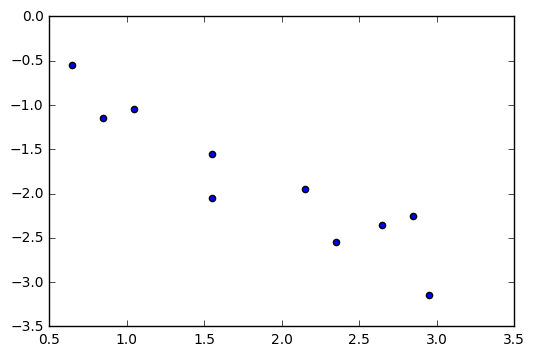

In [141]:
# a) Load the dataset, center & make scatter plot

# load data
Data = np.genfromtxt("pca-data-2d.dat", skip_header=False,dtype='float')

# center data
mean = np.mean(Data)
centered = Data - mean
print (centered.shape)
plt.scatter(centered[:,0],centered[:,1])
plt.show()

# 1.b)

In [142]:
# b) Determine the Principal Component Directions (PCs) and make another scatter plot of the
# same data points in the coordinate system spanned by the 2 PCs.

# 1. Cov Matrix
C = np.cov(centered.T)
# 2. get eigenvectors and eigenvalues of cov matrix, w values, v vectors
w,v = np.linalg.eigh(C)

# 3.plot data points in the coordinate systems spanned by the 2 PCs.

In [143]:
#we switch the vectors ,because the second one has a higher eigenvalue
evectors = v[::-1]
evalues = w[::-1]

centered_pca = np.zeros(centered.shape)

for i in range(centered.shape[0]):
    centered_pca[i,0] = evectors[0].T.dot(centered[i])
    centered_pca[i,1] = evectors[1].T.dot(centered[i])
    


first PC:
[-0.73517866  0.6778734 ]
eigenvalue of first PC:
1.28402771217
second PC:
[-0.6778734  -0.73517866]
eigenvalue of second PC:
0.0490833989383


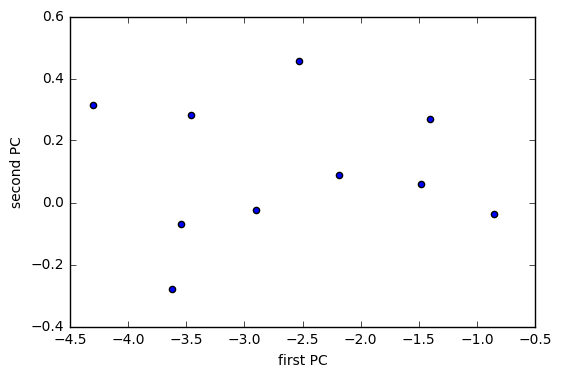

In [144]:
print 'first PC:' 
print evectors[0]
print 'eigenvalue of first PC:'
print evalues[0]
print 'second PC:' 
print evectors[1]
print 'eigenvalue of second PC:'
print evalues[1]
plt.xlabel('first PC')
plt.ylabel('second PC')
plt.scatter(centered_pca[:,0],centered_pca[:,1])
plt.show()


# 1.c(i)

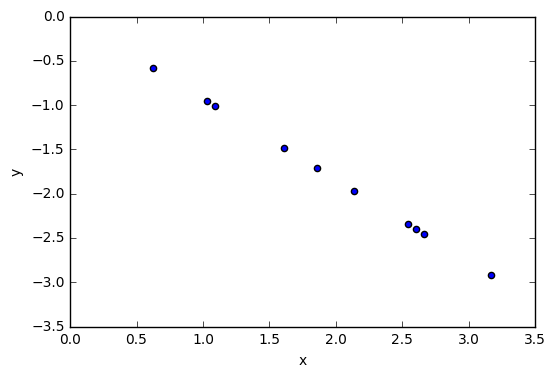

In [145]:
reconstruction1 = np.zeros(centered.shape)

for i in range(centered.shape[0]):
    reconstruction1[i] = evectors[0]*centered_pca[i,0]
  


plt.xlabel('x')
plt.ylabel('y')
plt.scatter(reconstruction1[:,0],reconstruction1[:,1])
plt.show()

# 1.c(ii)

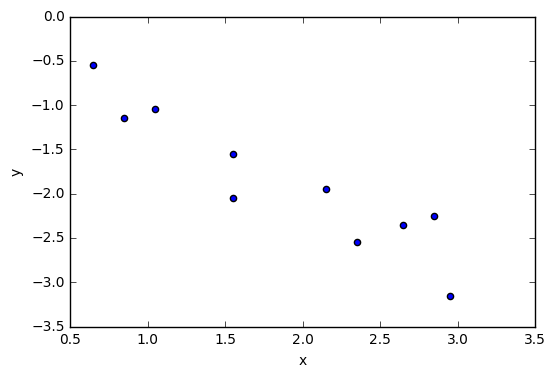

In [146]:
reconstruction2 = np.zeros(centered.shape)

for i in range(centered.shape[0]):
    reconstruction2[i] = evectors[0]*centered_pca[i,0] + evectors[1]*centered_pca[i,1]
    
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(reconstruction2[:,0],reconstruction2[:,1])
plt.show()

# 2.a

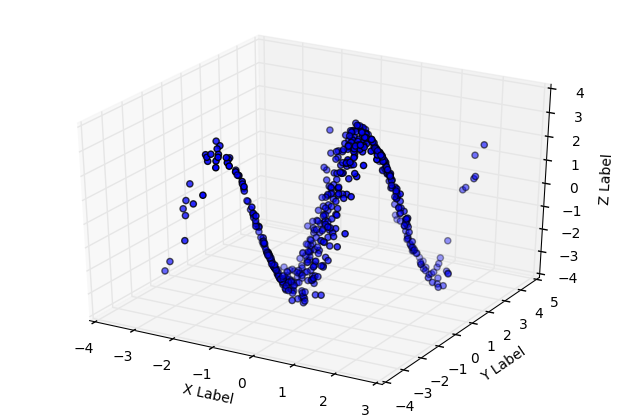

In [147]:
# a) Load the dataset, center & make scatter plot

# load data
Data = np.genfromtxt("pca-data-3d.txt",delimiter=',', skip_header=True,dtype='float')
# center data
mean = np.mean(Data)
centered = Data - mean

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(centered[:,0], centered[:,1], zs=centered[:,2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

# 2.b

In [148]:
C = np.cov(centered.T)
# 2. get eigenvectors and eigenvalues of cov matrix, w values, v vectors
w,v = np.linalg.eigh(C)

evectors = v[::-1]
evalues = w[::-1]

centered_pca = np.zeros(centered.shape)

for i in range(centered.shape[0]):
    centered_pca[i,0] = evectors[0].T.dot(centered[i])
    centered_pca[i,1] = evectors[1].T.dot(centered[i])
    centered_pca[i,2] = evectors[2].T.dot(centered[i])



coordinate system spanned by PC1 and PC2


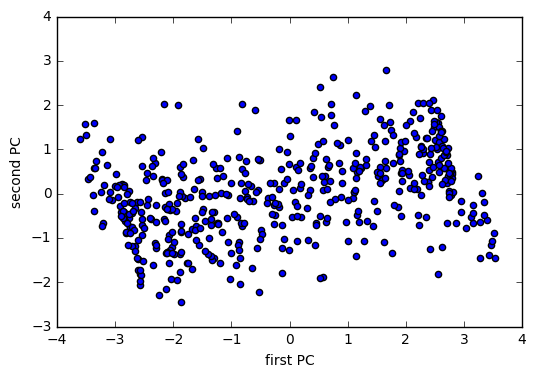

In [149]:
print 'coordinate system spanned by PC1 and PC2'
plt.xlabel('first PC')
plt.ylabel('second PC')
plt.scatter(centered_pca[:,0],centered_pca[:,1])
plt.show()

coordinate system spanned by PC1 and PC3


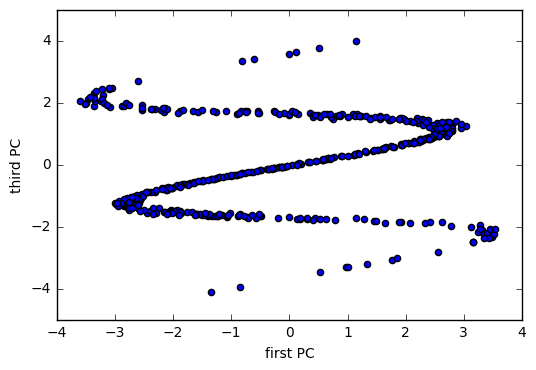

In [150]:
print 'coordinate system spanned by PC1 and PC3'
plt.xlabel('first PC')
plt.ylabel('third PC')
plt.scatter(centered_pca[:,0],centered_pca[:,2])
plt.show()

coordinate system spanned by PC2 and PC3


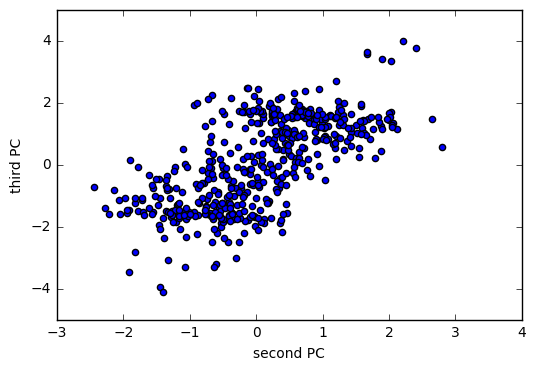

In [151]:
print 'coordinate system spanned by PC2 and PC3'
plt.xlabel('second PC')
plt.ylabel('third PC')
plt.scatter(centered_pca[:,1],centered_pca[:,2])
plt.show()

# 2.c(i)

reconstruction by using only PC1


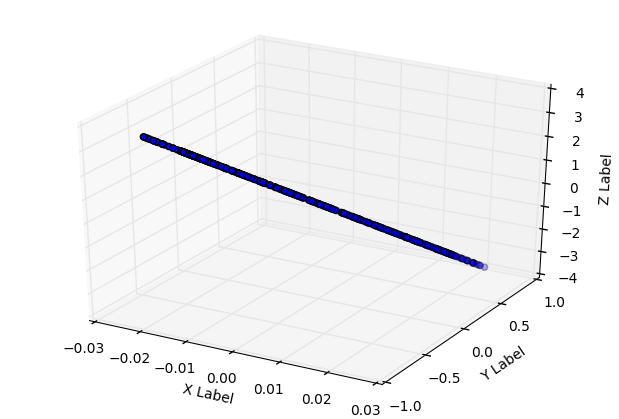

In [152]:
reconstruction1 = np.zeros(centered.shape)

for i in range(centered.shape[0]):
    reconstruction1[i] = evectors[0]*centered_pca[i,0]
  

print 'reconstruction by using only PC1'    
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(reconstruction1[:,0], reconstruction1[:,1], zs=reconstruction1[:,2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

# 2.c(ii)

reconstruction by using PC1 and PC2


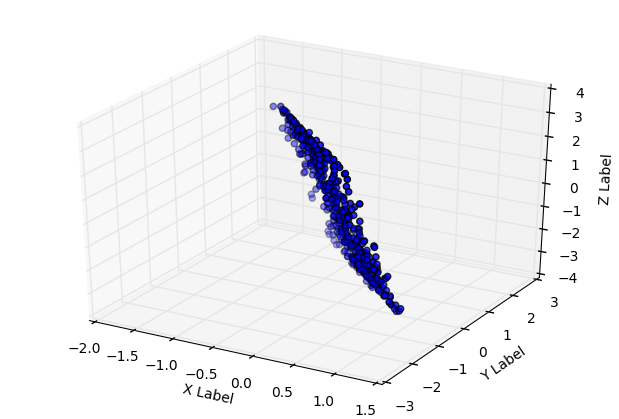

In [153]:
reconstruction2 = np.zeros(centered.shape)

for i in range(centered.shape[0]):
    reconstruction2[i] = evectors[0]*centered_pca[i,0] + evectors[1]*centered_pca[i,1]
print 'reconstruction by using PC1 and PC2'    
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(reconstruction2[:,0], reconstruction2[:,1], zs=reconstruction2[:,2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

# 2.c(iii)

reconstruction by using all PCs 


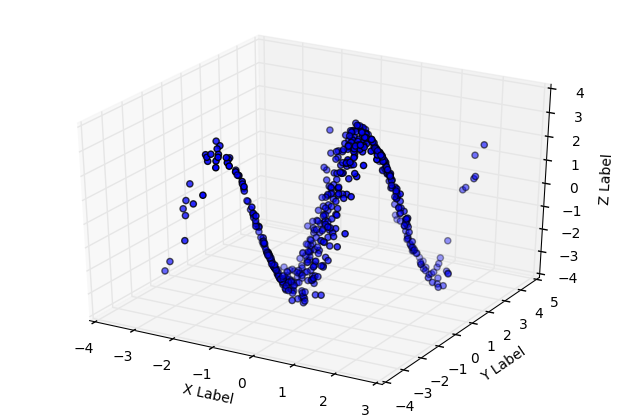

In [154]:
reconstruction3 = np.zeros(centered.shape)

for i in range(centered.shape[0]):
    reconstruction3[i] = evectors[0]*centered_pca[i,0] + evectors[1]*centered_pca[i,1] + evectors[2]*centered_pca[i,2]
print 'reconstruction by using all PCs '    
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(reconstruction3[:,0], reconstruction3[:,1], zs=reconstruction3[:,2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

# It seems like we need all three PCs to get a good reconstruction of the data

# 3.a)

In [97]:
# load data
Data = np.genfromtxt("expDat.txt", delimiter=',', skip_header=True,dtype='float')
# skip first row ("1","2",..)
expDat = Data[:,1:]

mean = np.mean(expDat)
centered = expDat - mean
C = np.cov(centered.T)
w,v = np.linalg.eigh(C)

evectors = v[::-1]
evalues = w[::-1]

centered_pca = np.zeros(centered.shape)

for i in range(centered.shape[0]):
    for j in range(centered.shape[1]):
        centered_pca[i,j] = evectors[j].T.dot(centered[i])
   
 

# 3.b)

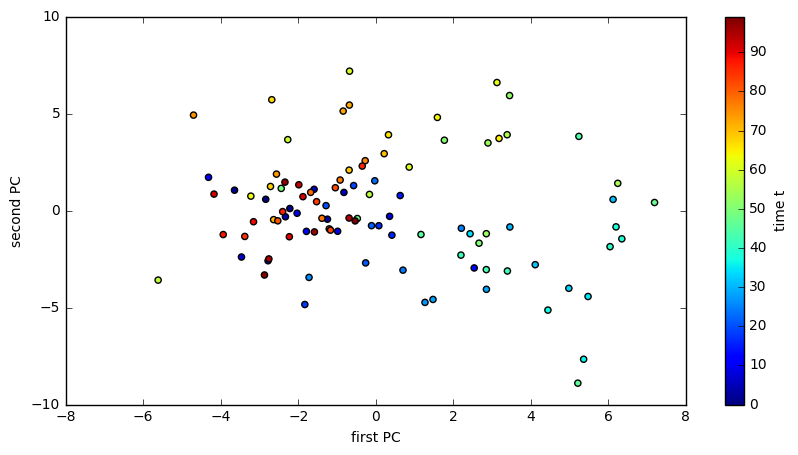

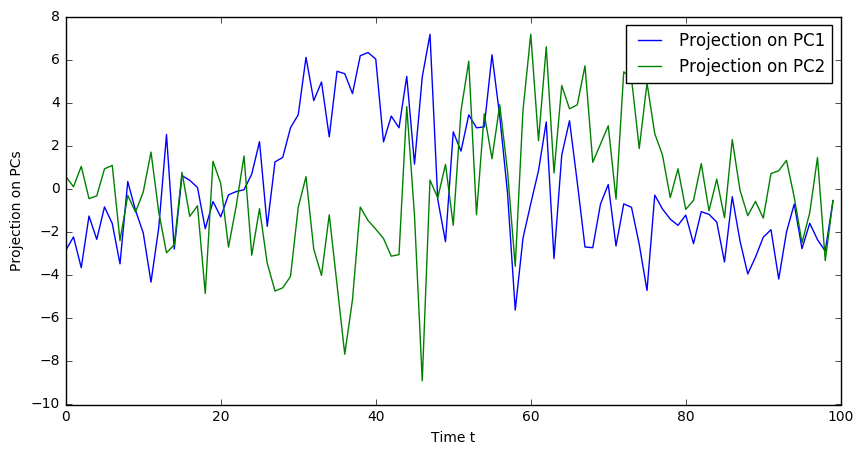

In [127]:
import matplotlib.cm as cm
cmap = cm.jet
reconstruction = np.zeros(centered.shape)

for i in range(centered.shape[0]):
    reconstruction[i] = evectors[0]*centered_pca[i,0] + evectors[1]*centered_pca[i,1]



t = np.arange(centered_pca.shape[0])
plt.figure(figsize=(10,5))
plt.xlabel('first PC')
plt.ylabel('second PC')

plt.scatter(centered_pca[:,0],centered_pca[:,1],c=t,cmap=cmap)
plt.colorbar(label='time t')
plt.show()


c = cmap(t)
plt.figure(figsize=(10,5))
plt.xlabel('Time t')
plt.ylabel('Projection on PCs')
plt.xlabel('Time t')
plt.ylabel('Projection on PCs')

plt.plot(t,centered_pca[:,0],label='Projection on PC1')
plt.plot(t,centered_pca[:,1],label='Projection on PC2')
plt.legend()
plt.show()